In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming columns

df.rename(columns={
    'v1':'label',
    'v2':'msg'
},inplace=True)

In [9]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# EDA

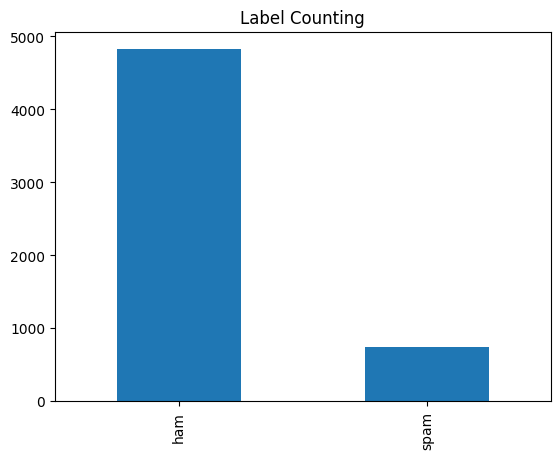

In [33]:
df['label'].value_counts().plot(kind='bar')
plt.title("Label Counting")
plt.show()

In [11]:
# Counting words Length

df['msg_length'] = df['msg'].apply(len)
df.head()

,label,msg,msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


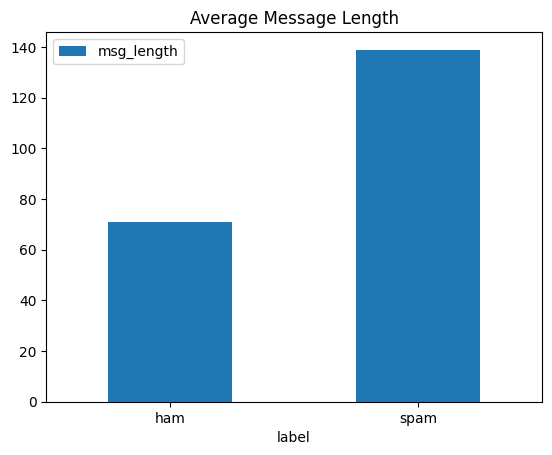

In [24]:
ndf = df[['label','msg_length']]
ndf.groupby('label').mean().plot(kind='bar')
plt.title("Average Message Length")
plt.xticks(rotation=0)
plt.show()

# Natural Language Processing (NLP)

In [12]:
# lowercasing
df['msg'] = df['msg'].str.lower()

# remove punctuation
import string
def rem_punc(text):
  return text.translate(str.maketrans('','',string.punctuation))

df['msg'] = df['msg'].apply(rem_punc)

# removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def rem_stwords(text):
  new_text = []
  for word in text.split():
    if word not in stopwords.words('english'):
      new_text.append(word)
  t = new_text[:]
  new_text.clear()
  return " ".join(t)

df['msg'] = df['msg'].apply(rem_stwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df.head()

,label,msg,msg_length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


# Vectorization


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['msg'])

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
Y = enc.fit_transform(df['label'])

# Splitting

In [44]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.33, random_state=8)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3733, 9376) (1839, 9376) (3733,) (1839,)


# Training Model

In [45]:
from sklearn.metrics import accuracy_score as acc

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy: ",acc(Y_train,train_pred))
print("Testing Accuracy: ",acc(Y_test,test_pred))

Training Accuracy:  0.9584784355746049
Testing Accuracy:  0.9461663947797716


In [47]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy: ",acc(Y_train,train_pred))
print("Testing Accuracy: ",acc(Y_test,test_pred))

Training Accuracy:  0.995713903027056
Testing Accuracy:  0.9858618814573138
